<a href="https://colab.research.google.com/github/belhouariayoub/PROJETEMBIA/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys, os, array, time
import numpy as np
import matplotlib.pyplot as plt
import IPython

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.layers import Dropout,Dense
from sklearn.model_selection import train_test_split

In [2]:
class timer:
    def __init__(self, name=None):
        self.name = name
        self.T_start = -1
        self.T_stop  = -1

    def tic(self):
        self.T_start = time.time()

    def toc(self):
        self.T_stop = time.time()

    def res(self):
        if (self.T_start == -1) or (self.T_stop == -1):
            print("Error: Measurement cannot be done")
        else:
            return str(self.T_stop - self.T_start)

In [3]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model Loss')
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [ ]:
def load_data(path):
    with np.load(path) as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']
        return (x_train, y_train), (x_test, y_test)

In [4]:
from tensorflow.python.ops.gen_array_ops import mirror_pad_eager_fallback
def build_model():

 
        # Small CNN for MNIST recognition
        model = models.Sequential()
        
        # Dense layer
        model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(62,64,3)))
       # model.add(layers.MaxPooling2D((2, 2), padding='valid'))


        model.add(layers.Conv2D(32, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2), padding='valid'))
        model.add(Dropout(0.2))     

       

        model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
      #  model.add(layers.MaxPooling2D((2, 2), padding='valid'))
       # model.add(Dropout(0.2))     


        model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
        model.add(layers.MaxPooling2D((2, 2), padding='valid'))
        model.add(Dropout(0.2)) 

        model.add(layers.Flatten())
        model.add(layers.Dense(512, activation='relu'))
        model.add(Dropout(0.2))    
              
        # Output layer
        model.add(layers.Dense(4, activation='softmax'))
        model.summary()  
     


        return model


In [5]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/EMBEDDEDIA"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/EMBEDDEDIA


In [6]:
!ls

Saline_bottle_original_size	 test.h5     Y_data.npy
Saline_bottle_original_size_50%  X_data.npy


In [13]:
X_data = []
Y_data = []
X_data=np.load('X_data.npy')
Y_data=np.load('Y_data.npy')

x_train,x_test,y_train,y_test = train_test_split(X_data,Y_data, test_size=0.20, random_state=4)
x_train.reshape(64,64,3,-1)
x_test.reshape(64,64,3,-1)
y_train=y_train.reshape(y_train.shape[0],1)
y_test=y_test.reshape(y_test.shape[0],1)


# Small CNN for MNIST recognition
model = models.Sequential()
        
# Dense layer
model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(64,64,3)))
# model.add(layers.MaxPooling2D((2, 2), padding='valid'))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), padding='valid'))
model.add(Dropout(0.2))     
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), padding='valid'))
model.add(Dropout(0.2)) 
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.2))    
model.add(layers.Dense(4, activation='softmax'))
model.summary()
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = model.fit(x_train,y_train, epochs=20, validation_data=(x_test,y_test))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 31, 31, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 31, 31, 64)        36928     
                                                      

27/27 - 3s - loss: 0.4614 - accuracy: 0.8898 - 3s/epoch - 125ms/step


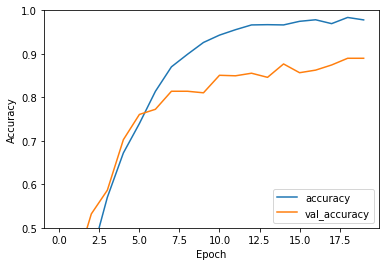

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

In [ ]:
model.save_weights('test.h5')


In [ ]:
class dataset:
    def __init__(self):

      self.X_data =np.load('X_data.npy')
      self.Y_data =np.load('Y_data.npy')
      self.x_train,self.x_test,self.y_train,self.y_test = train_test_split(X_data,Y_data, test_size=0.20, random_state=4)
       
      #(self.x_train, self.y_train), (self.x_test, self.y_test)  = load_data('mnist.npz')
        
      # Rescale of images
      x_train = x_train / 255.0
      x_test  = x_test / 255.0
        
        # Take 10.000 image from x_train to constitue a validation dataset
       #self.x_val = self.x_train[50000:]
        #self.y_val = self.y_train[50000:]
        
        #self.x_train = self.x_train[:50000]
        #self.y_train = self.y_train[:50000]
        
        # Reshape of x_train et x_test
        #if tf.keras.datasets.mnist.image_data_format == 'channel_first':
        #self.x_train = self.x_train.reshape((self.x_train.shape[0], 1, self.x_train.shape[1], self.x_train.shape[2]))
        #self.x_val   = self.x_val.reshape((self.x_val.shape[0], 1, self.x_val.shape[1], self.x_val.shape[2]))
        #self.x_test  = self.x_test.reshape((self.x_test.shape[0], 1, self.x_test.shape[1], self.x_test.shape[2]))
        #self.input_shape = (1, 28, 28)
        
        #else:
        #self.x_train = self.x_train.reshape((self.x_train.shape[0], self.x_train.shape[1], self.x_train.shape[2], 1))
        #self.x_val   = self.x_val.reshape((self.x_val.shape[0], self.x_val.shape[1], self.x_val.shape[2], 1))
        #self.x_test  = self.x_test.reshape((self.x_test.shape[0], self.x_test.shape[1], self.x_test.shape[2], 1))
        #self.input_shape = self.x_train.shape[1:]
        
        
        # Transform label to one hot vector
        #self.y_train = tf.keras.utils.to_categorical(self.y_train, 10)
        #self.y_val   = tf.keras.utils.to_categorical(self.y_val, 10)
        #self.y_test  = tf.keras.utils.to_categorical(self.y_test, 10)
        
        #self.nb_epochs  = 5
        #self.batch_size = 128
        
        #print("Number training examples:  ", len(self.x_train))
        #print("Number test examples:      ", len(self.x_test))
        #print("Number validation examples:", len(self.x_val))
        #print("\n")
        #print("\tTrain Dataset      --> x_train: " + str(np.shape(self.x_train)) + "    y_train: " + str(np.shape(self.y_train)))
        #print("\tValidation Dataset --> x_val:   " + str(np.shape(self.x_val))   + "    y_val:   " + str(np.shape(self.y_val)))
        print("\tTesting Dataset    --> x_test:  " + str(np.shape(self.x_test))  + "    y_test:  " + str(np.shape(self.y_test)))
        print("\tNumber of epochs:  "+str(self.nb_epochs))
        print("\tBatch size:        "+str(self.batch_size))
        print("\n")
        
    def MLP_input_data_preparation(self):
        self.input_shape = np.prod(self.x_train.shape[1:])
        self.x_train = self.x_train.reshape(self.x_train.shape[0], self.input_shape)
        self.x_val   = self.x_val.reshape(self.x_val.shape[0], self.input_shape)
        self.x_test  = self.x_test.reshape(self.x_test.shape[0], self.input_shape)
        
        print ("\n")
        print ("New dimensions after MLP reshape:\n")
        print ("Train Dataset      --> x_train: " + str(np.shape(self.x_train)) + "    y_train: " + str(np.shape(self.y_train)))
        print ("Validation Dataset --> x_val:   " + str(np.shape(self.x_val))   + "    y_val:   " + str(np.shape(self.y_val)))
        print ("Testing Dataset    --> x_test:  " + str(np.shape(self.x_test))  + "    y_test:  " + str(np.shape(self.y_test)))
        print ("\n")
    
  

IndentationError: ignored

In [ ]:
class dataset:
    def __init__(self):

      self.X_data =np.load('X_data.npy')
      self.Y_data =np.load('Y_data.npy')
      self.x_train,self.x_test,self.y_train,self.y_test = train_test_split(X_data,Y_data, test_size=0.20, random_state=4)
       
      #(self.x_train, self.y_train), (self.x_test, self.y_test)  = load_data('mnist.npz')
        
      # Rescale of images
      x_train = x_train / 255.0
      x_test  = x_test / 255.0
        
        # Take 10.000 image from x_train to constitue a validation dataset
       #self.x_val = self.x_train[50000:]
        #self.y_val = self.y_train[50000:]
        
        #self.x_train = self.x_train[:50000]
        #self.y_train = self.y_train[:50000]
        
        # Reshape of x_train et x_test
        #if tf.keras.datasets.mnist.image_data_format == 'channel_first':
        #self.x_train = self.x_train.reshape((self.x_train.shape[0], 1, self.x_train.shape[1], self.x_train.shape[2]))
        #self.x_val   = self.x_val.reshape((self.x_val.shape[0], 1, self.x_val.shape[1], self.x_val.shape[2]))
        #self.x_test  = self.x_test.reshape((self.x_test.shape[0], 1, self.x_test.shape[1], self.x_test.shape[2]))
        #self.input_shape = (1, 28, 28)
        
        #else:
        #self.x_train = self.x_train.reshape((self.x_train.shape[0], self.x_train.shape[1], self.x_train.shape[2], 1))
        #self.x_val   = self.x_val.reshape((self.x_val.shape[0], self.x_val.shape[1], self.x_val.shape[2], 1))
        #self.x_test  = self.x_test.reshape((self.x_test.shape[0], self.x_test.shape[1], self.x_test.shape[2], 1))
        #self.input_shape = self.x_train.shape[1:]
        
        
        # Transform label to one hot vector
        #self.y_train = tf.keras.utils.to_categorical(self.y_train, 10)
        #self.y_val   = tf.keras.utils.to_categorical(self.y_val, 10)
        #self.y_test  = tf.keras.utils.to_categorical(self.y_test, 10)
        
        #self.nb_epochs  = 5
        #self.batch_size = 128
        
        #print("Number training examples:  ", len(self.x_train))
        #print("Number test examples:      ", len(self.x_test))
        #print("Number validation examples:", len(self.x_val))
        #print("\n")
        #print("\tTrain Dataset      --> x_train: " + str(np.shape(self.x_train)) + "    y_train: " + str(np.shape(self.y_train)))
        #print("\tValidation Dataset --> x_val:   " + str(np.shape(self.x_val))   + "    y_val:   " + str(np.shape(self.y_val)))
        print("\tTesting Dataset    --> x_test:  " + str(np.shape(self.x_test))  + "    y_test:  " + str(np.shape(self.y_test)))
        print("\tNumber of epochs:  "+str(self.nb_epochs))
        print("\tBatch size:        "+str(self.batch_size))
        print("\n")
        
    def MLP_input_data_preparation(self):
        self.input_shape = np.prod(self.x_train.shape[1:])
        self.x_train = self.x_train.reshape(self.x_train.shape[0], self.input_shape)
        self.x_val   = self.x_val.reshape(self.x_val.shape[0], self.input_shape)
        self.x_test  = self.x_test.reshape(self.x_test.shape[0], self.input_shape)
        
        print ("\n")
        print ("New dimensions after MLP reshape:\n")
        print ("Train Dataset      --> x_train: " + str(np.shape(self.x_train)) + "    y_train: " + str(np.shape(self.y_train)))
        print ("Validation Dataset --> x_val:   " + str(np.shape(self.x_val))   + "    y_val:   " + str(np.shape(self.y_val)))
        print ("Testing Dataset    --> x_test:  " + str(np.shape(self.x_test))  + "    y_test:  " + str(np.shape(self.y_test)))
        print ("\n")
    
  

IndentationError: ignored

In [ ]:

build_model()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 62, 64, 32)        896       
                                                                 
 conv2d_33 (Conv2D)          (None, 60, 62, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 30, 31, 32)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 30, 31, 32)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 30, 31, 64)        18496     
                                                                 
 conv2d_35 (Conv2D)          (None, 30, 31, 64)        36928     
                                                      

/content/drive/MyDrive/EMBEDDEDIA


0

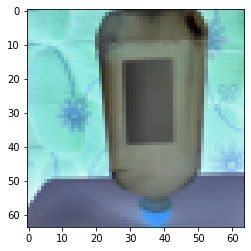

In [ ]:
class dataset:
    def __init__(self):

      self.X_data =np.load('X_data.npy')
      self.Y_data =np.load('Y_data.npy')
      self.x_train,self.x_test,self.y_train,self.y_test = train_test_split(X_data,Y_data, test_size=0.20, random_state=4)
       
      #(self.x_train, self.y_train), (self.x_test, self.y_test)  = load_data('mnist.npz')
        
      # Rescale of images
      x_train = x_train / 255.0
      x_test  = x_test / 255.0
        
        # Take 10.000 image from x_train to constitue a validation dataset
       #self.x_val = self.x_train[50000:]
        #self.y_val = self.y_train[50000:]
        
        #self.x_train = self.x_train[:50000]
        #self.y_train = self.y_train[:50000]
        
        # Reshape of x_train et x_test
        #if tf.keras.datasets.mnist.image_data_format == 'channel_first':
        #self.x_train = self.x_train.reshape((self.x_train.shape[0], 1, self.x_train.shape[1], self.x_train.shape[2]))
        #self.x_val   = self.x_val.reshape((self.x_val.shape[0], 1, self.x_val.shape[1], self.x_val.shape[2]))
        #self.x_test  = self.x_test.reshape((self.x_test.shape[0], 1, self.x_test.shape[1], self.x_test.shape[2]))
        #self.input_shape = (1, 28, 28)
        
        #else:
        #self.x_train = self.x_train.reshape((self.x_train.shape[0], self.x_train.shape[1], self.x_train.shape[2], 1))
        #self.x_val   = self.x_val.reshape((self.x_val.shape[0], self.x_val.shape[1], self.x_val.shape[2], 1))
        #self.x_test  = self.x_test.reshape((self.x_test.shape[0], self.x_test.shape[1], self.x_test.shape[2], 1))
        #self.input_shape = self.x_train.shape[1:]
        
        
        # Transform label to one hot vector
        #self.y_train = tf.keras.utils.to_categorical(self.y_train, 10)
        #self.y_val   = tf.keras.utils.to_categorical(self.y_val, 10)
        #self.y_test  = tf.keras.utils.to_categorical(self.y_test, 10)
        
        #self.nb_epochs  = 5
        #self.batch_size = 128
        
        #print("Number training examples:  ", len(self.x_train))
        #print("Number test examples:      ", len(self.x_test))
        #print("Number validation examples:", len(self.x_val))
        #print("\n")
        #print("\tTrain Dataset      --> x_train: " + str(np.shape(self.x_train)) + "    y_train: " + str(np.shape(self.y_train)))
        #print("\tValidation Dataset --> x_val:   " + str(np.shape(self.x_val))   + "    y_val:   " + str(np.shape(self.y_val)))
        print("\tTesting Dataset    --> x_test:  " + str(np.shape(self.x_test))  + "    y_test:  " + str(np.shape(self.y_test)))
        print("\tNumber of epochs:  "+str(self.nb_epochs))
        print("\tBatch size:        "+str(self.batch_size))
        print("\n")
        
    def MLP_input_data_preparation(self):
        self.input_shape = np.prod(self.x_train.shape[1:])
        self.x_train = self.x_train.reshape(self.x_train.shape[0], self.input_shape)
        self.x_val   = self.x_val.reshape(self.x_val.shape[0], self.input_shape)
        self.x_test  = self.x_test.reshape(self.x_test.shape[0], self.input_shape)
        
        print ("\n")
        print ("New dimensions after MLP reshape:\n")
        print ("Train Dataset      --> x_train: " + str(np.shape(self.x_train)) + "    y_train: " + str(np.shape(self.y_train)))
        print ("Validation Dataset --> x_val:   " + str(np.shape(self.x_val))   + "    y_val:   " + str(np.shape(self.y_val)))
        print ("Testing Dataset    --> x_test:  " + str(np.shape(self.x_test))  + "    y_test:  " + str(np.shape(self.y_test)))
        print ("\n")
    
  

IndentationError: ignored